# Barcalone Airbnb: EDA, Visualization, Regression
EDA - Visualization - Modeling

# 1. Dataset


* **id**: listing ID
* **name**: name of the listing
* **host_id**: host ID
* **host_name**: name of the host
* **neighbourhood_group**: location
* **neighbourhood**: area
* **latitude**: latitude coordinates
* **longitude**: longitude coordinates
* **room_type**: listing space type
* **price**: price in dollars
* **minimum_nights**: amount of nights minimum
* **number_of_reviews**: number of reviews
* **last_review**: latest review
* **reviews_per_month**: number of reviews per month
* **calculated_host_listings_count**: amount of listing per host
* **availability_365**: number of days when listing is available for booking
*   number_of_reviews_ltm

In [90]:
# Import all libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt  # ploting the data
import seaborn as sns # ploting the data
import math # calculation
from pylab import *

# 2. Exploratory Data Analysis

* Examiner les colonnes
 * Vérifiez que l'ensemble de données est bien rangé
 * Vérifiez que chaque ligne est une observation et chaque colonne est une variable
 * Déterminer s'il manque des valeurs
 * Examiner les distributions de variables

In [91]:
# load the data
data = pd.read_csv('Barcelone, Catalogne, Espagne\listings.csv')

In [92]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17475,Rental unit in 08013 Barcelona · ★4.40 · 1 bed...,65623,Luca,Eixample,la Dreta de l'Eixample,41.399390,2.17044,Entire home/apt,140.0,5,26,2023-12-04,0.16,1,32,9,NaN
1,18674,Rental unit in Barcelona · ★4.33 · 3 bedrooms ...,71615,Mireia Maria,Eixample,la Sagrada Família,41.405560,2.17262,Entire home/apt,121.0,1,40,2023-11-07,0.31,30,39,7,HUTB-002062
2,198958,Rental unit in Barcelona · ★4.69 · 4 bedrooms ...,971768,Laura,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou,41.408050,2.21487,Entire home/apt,304.0,2,105,2023-10-16,0.74,9,137,26,HUTB-000926
3,23197,Rental unit in Sant Adria de Besos · ★4.77 · 3...,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412432,2.21975,Entire home/apt,200.0,3,75,2023-11-25,0.48,2,300,11,HUTB005057
4,32711,Rental unit in Barcelona · ★4.48 · 2 bedrooms ...,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.17015,Entire home/apt,79.0,1,99,2023-10-18,0.66,3,297,16,HUTB-001722


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18321 entries, 0 to 18320
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              18321 non-null  int64  
 1   name                            18321 non-null  object 
 2   host_id                         18321 non-null  int64  
 3   host_name                       18319 non-null  object 
 4   neighbourhood_group             18321 non-null  object 
 5   neighbourhood                   18321 non-null  object 
 6   latitude                        18321 non-null  float64
 7   longitude                       18321 non-null  float64
 8   room_type                       18321 non-null  object 
 9   price                           16056 non-null  float64
 10  minimum_nights                  18321 non-null  int64  
 11  number_of_reviews               18321 non-null  int64  
 12  last_review                     

Nous supprimons les colonnes qui ne présentent pas d'intérêt ou qui pourraient poser des problèmes de confidentialité.

In [94]:
# Drop the data that are not of interest and/or causing privacy issues
data.drop(['id','host_name','last_review','license'], axis=1, inplace=True)
# Visualize the first 5 rows
data.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Rental unit in 08013 Barcelona · ★4.40 · 1 bed...,65623,Eixample,la Dreta de l'Eixample,41.399390,2.17044,Entire home/apt,140.0,5,26,0.16,1,32,9
1,Rental unit in Barcelona · ★4.33 · 3 bedrooms ...,71615,Eixample,la Sagrada Família,41.405560,2.17262,Entire home/apt,121.0,1,40,0.31,30,39,7
2,Rental unit in Barcelona · ★4.69 · 4 bedrooms ...,971768,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou,41.408050,2.21487,Entire home/apt,304.0,2,105,0.74,9,137,26
3,Rental unit in Sant Adria de Besos · ★4.77 · 3...,90417,Sant Martí,el Besòs i el Maresme,41.412432,2.21975,Entire home/apt,200.0,3,75,0.48,2,300,11
4,Rental unit in Barcelona · ★4.48 · 2 bedrooms ...,135703,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.17015,Entire home/apt,79.0,1,99,0.66,3,297,16


In [95]:
# Determine the number of missing values for every column
data.isnull().sum()

name                                 0
host_id                              0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             2265
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 4369
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [96]:
#replacing all NaN values in 'reviews_per_month' with 0
data.fillna({'price':0,'reviews_per_month':0}, inplace=True)

In [97]:
data.isnull().sum()


name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [98]:
#examine the dataset
(data[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365','number_of_reviews_ltm']]
 .describe())

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,18321.000000,18321.000000,18321.000000,18321.000000,18321.000000,18321.000000,18321.000000
mean,110.855794,14.865892,43.864309,1.098999,33.812838,171.187381,11.819933
std,515.143216,31.514680,89.887244,1.764162,66.230543,136.551292,23.855482
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,36.000000,1.000000,1.000000,0.020000,1.000000,13.000000,0.000000
50%,77.000000,3.000000,7.000000,0.380000,5.000000,176.000000,2.000000
75%,123.000000,31.000000,44.000000,1.650000,29.000000,310.000000,15.000000
max,56815.000000,1124.000000,1941.000000,67.300000,318.000000,365.000000,1065.000000


In [99]:
# Exclude property with listed price of 0
data = data.loc[data['price'] > 0]


In [100]:
#examine the dataset
data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.605600e+04,16056.000000,16056.000000,16056.000000,16056.000000,16056.000000,16056.000000,16056.000000,16056.000000,16056.000000
mean,1.798325e+08,41.391703,2.166902,126.494083,15.876682,48.184542,1.222225,38.219856,194.509342,13.391941
std,1.815736e+08,0.013657,0.017285,548.481873,32.831360,94.347352,1.837299,69.565191,129.051319,25.030324
min,1.070400e+04,41.352720,2.085593,9.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,9.400556e+06,41.381050,2.156774,50.000000,1.000000,1.000000,0.060000,2.000000,72.000000,0.000000
50%,1.168451e+08,41.389511,2.168030,87.000000,3.000000,8.000000,0.520000,7.000000,214.000000,3.000000
75%,3.463675e+08,41.400881,2.177330,130.000000,31.000000,52.000000,1.880000,35.000000,320.000000,19.000000
max,5.496387e+08,41.459560,2.227710,56815.000000,1124.000000,1941.000000,67.300000,318.000000,365.000000,1065.000000


In [101]:
data.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Rental unit in 08013 Barcelona · ★4.40 · 1 bed...,65623,Eixample,la Dreta de l'Eixample,41.399390,2.17044,Entire home/apt,140.0,5,26,0.16,1,32,9
1,Rental unit in Barcelona · ★4.33 · 3 bedrooms ...,71615,Eixample,la Sagrada Família,41.405560,2.17262,Entire home/apt,121.0,1,40,0.31,30,39,7
2,Rental unit in Barcelona · ★4.69 · 4 bedrooms ...,971768,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou,41.408050,2.21487,Entire home/apt,304.0,2,105,0.74,9,137,26
3,Rental unit in Sant Adria de Besos · ★4.77 · 3...,90417,Sant Martí,el Besòs i el Maresme,41.412432,2.21975,Entire home/apt,200.0,3,75,0.48,2,300,11
4,Rental unit in Barcelona · ★4.48 · 2 bedrooms ...,135703,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.17015,Entire home/apt,79.0,1,99,0.66,3,297,16


In [102]:
data['minimum_nights']

0         5
1         1
2         2
3         3
4         1
         ..
18316     1
18317    32
18318    32
18319     2
18320    31
Name: minimum_nights, Length: 16056, dtype: int64

In [103]:
# Recode data as categorical
# https://datascience.stackexchange.com/questions/29093/continuous-variable-to-categorical-by-quartiles
data_encoded = data.copy()
data_encoded['minimum_nights'] = pd.qcut(data['minimum_nights'], q=2, labels=["minimum_nights_low", "minimum_nights_high"])
data_encoded['number_of_reviews'] = pd.qcut(data['number_of_reviews'], q=3, labels=["number_of_reviews_low", "minimum_nights_medium", "number_of_reviews_high"])
data_encoded['reviews_per_month'] = pd.qcut(data['reviews_per_month'], q=2, labels=["reviews_per_month_low", "reviews_per_month_high"])
data_encoded['calculated_host_listings_count'] = pd.cut(data['calculated_host_listings_count'], 
                                                bins=[0, 2, 327],
                                                labels=["calculated_host_listings_count_low", "calculated_host_listings_count_high"])
data_encoded['availability_365'] = pd.qcut(data['availability_365'], q=2, labels=["availability_low", "availability_high"])
data_encoded['number_of_reviews_ltm'] = pd.qcut(data['number_of_reviews_ltm'], q=2, labels=["number_of_reviews_ltm_low", "number_of_reviews_ltm_high"])

In [104]:
data_encoded.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Rental unit in 08013 Barcelona · ★4.40 · 1 bed...,65623,Eixample,la Dreta de l'Eixample,41.399390,2.17044,Entire home/apt,140.0,minimum_nights_high,minimum_nights_medium,reviews_per_month_low,calculated_host_listings_count_low,availability_low,number_of_reviews_ltm_high
1,Rental unit in Barcelona · ★4.33 · 3 bedrooms ...,71615,Eixample,la Sagrada Família,41.405560,2.17262,Entire home/apt,121.0,minimum_nights_low,number_of_reviews_high,reviews_per_month_low,calculated_host_listings_count_high,availability_low,number_of_reviews_ltm_high
2,Rental unit in Barcelona · ★4.69 · 4 bedrooms ...,971768,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou,41.408050,2.21487,Entire home/apt,304.0,minimum_nights_low,number_of_reviews_high,reviews_per_month_high,calculated_host_listings_count_high,availability_low,number_of_reviews_ltm_high
3,Rental unit in Sant Adria de Besos · ★4.77 · 3...,90417,Sant Martí,el Besòs i el Maresme,41.412432,2.21975,Entire home/apt,200.0,minimum_nights_low,number_of_reviews_high,reviews_per_month_low,calculated_host_listings_count_low,availability_high,number_of_reviews_ltm_high
4,Rental unit in Barcelona · ★4.48 · 2 bedrooms ...,135703,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.17015,Entire home/apt,79.0,minimum_nights_low,number_of_reviews_high,reviews_per_month_high,calculated_host_listings_count_high,availability_high,number_of_reviews_ltm_high


In [105]:
import pandas as pd
import numpy as np

# Création d'un DataFrame avec une colonne 'value' de 20 nombres aléatoires entre 1 et 80
df = pd.DataFrame({'value': np.random.randint(1, 80, 20)})

# Utilisation de qcut pour créer une nouvelle colonne 'group' basée sur les quantiles
df['group'] = pd.qcut(df['value'], q=2, labels=["Q1", "Q2"])

# Affichage du DataFrame résultant
print(df)

    value group
0      41    Q2
1      71    Q2
2      10    Q1
3      38    Q1
4      40    Q2
5       1    Q1
6       5    Q1
7      34    Q1
8       2    Q1
9      29    Q1
10     54    Q2
11     77    Q2
12     79    Q2
13     18    Q1
14     24    Q1
15     39    Q2
16     46    Q2
17     34    Q1
18     66    Q2
19     54    Q2


In [106]:
data_encoded.isnull().sum()

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [107]:
data_encoded.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Rental unit in 08013 Barcelona · ★4.40 · 1 bed...,65623,Eixample,la Dreta de l'Eixample,41.399390,2.17044,Entire home/apt,140.0,minimum_nights_high,minimum_nights_medium,reviews_per_month_low,calculated_host_listings_count_low,availability_low,number_of_reviews_ltm_high
1,Rental unit in Barcelona · ★4.33 · 3 bedrooms ...,71615,Eixample,la Sagrada Família,41.405560,2.17262,Entire home/apt,121.0,minimum_nights_low,number_of_reviews_high,reviews_per_month_low,calculated_host_listings_count_high,availability_low,number_of_reviews_ltm_high
2,Rental unit in Barcelona · ★4.69 · 4 bedrooms ...,971768,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou,41.408050,2.21487,Entire home/apt,304.0,minimum_nights_low,number_of_reviews_high,reviews_per_month_high,calculated_host_listings_count_high,availability_low,number_of_reviews_ltm_high
3,Rental unit in Sant Adria de Besos · ★4.77 · 3...,90417,Sant Martí,el Besòs i el Maresme,41.412432,2.21975,Entire home/apt,200.0,minimum_nights_low,number_of_reviews_high,reviews_per_month_low,calculated_host_listings_count_low,availability_high,number_of_reviews_ltm_high
4,Rental unit in Barcelona · ★4.48 · 2 bedrooms ...,135703,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.17015,Entire home/apt,79.0,minimum_nights_low,number_of_reviews_high,reviews_per_month_high,calculated_host_listings_count_high,availability_high,number_of_reviews_ltm_high


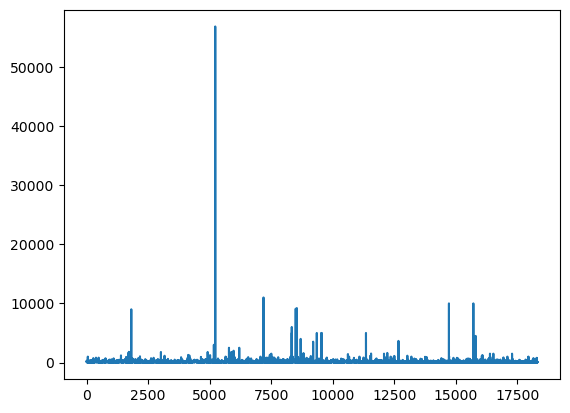

In [108]:
import matplotlib.pyplot as plt
data["price"].plot()
plt.show()

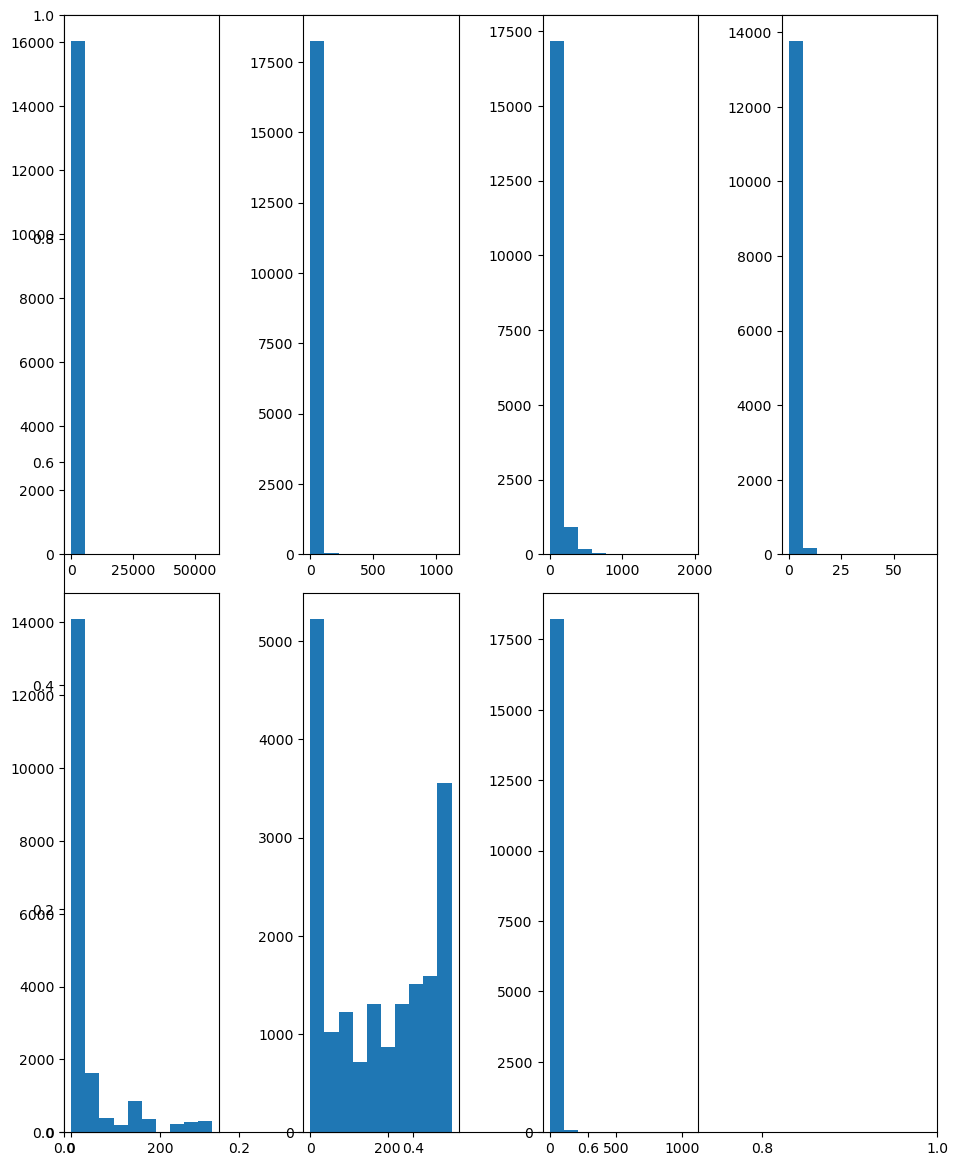

In [89]:

from pylab import *
f, ax = plt.subplots(figsize=(10, 12))  # Crée une figure avec une taille de 10 pouces de largeur et 12 pouces de hauteur

plt.subplot(2, 4, 1)
plt.hist(data['price'])

plt.subplot(2, 4, 2)
plt.hist(data['minimum_nights'])

plt.subplot(2, 4, 3)
plt.hist(data['number_of_reviews'])

plt.subplot(2, 4, 4)
plt.hist(data['reviews_per_month'])

plt.subplot(2, 4, 5)
plt.hist(data['calculated_host_listings_count'])

plt.subplot(2, 4, 6)
plt.hist(data['availability_365'])

plt.subplot(2, 4, 7)  # Utilisez le subplot 2,4,7 pour le prochain histogramme
plt.hist(data['number_of_reviews_ltm'])

plt.tight_layout()
plt.draw()
plt.show()

In [ ]:
les graphes de montre pas une bonne distribution a vas le corriger avec le log10

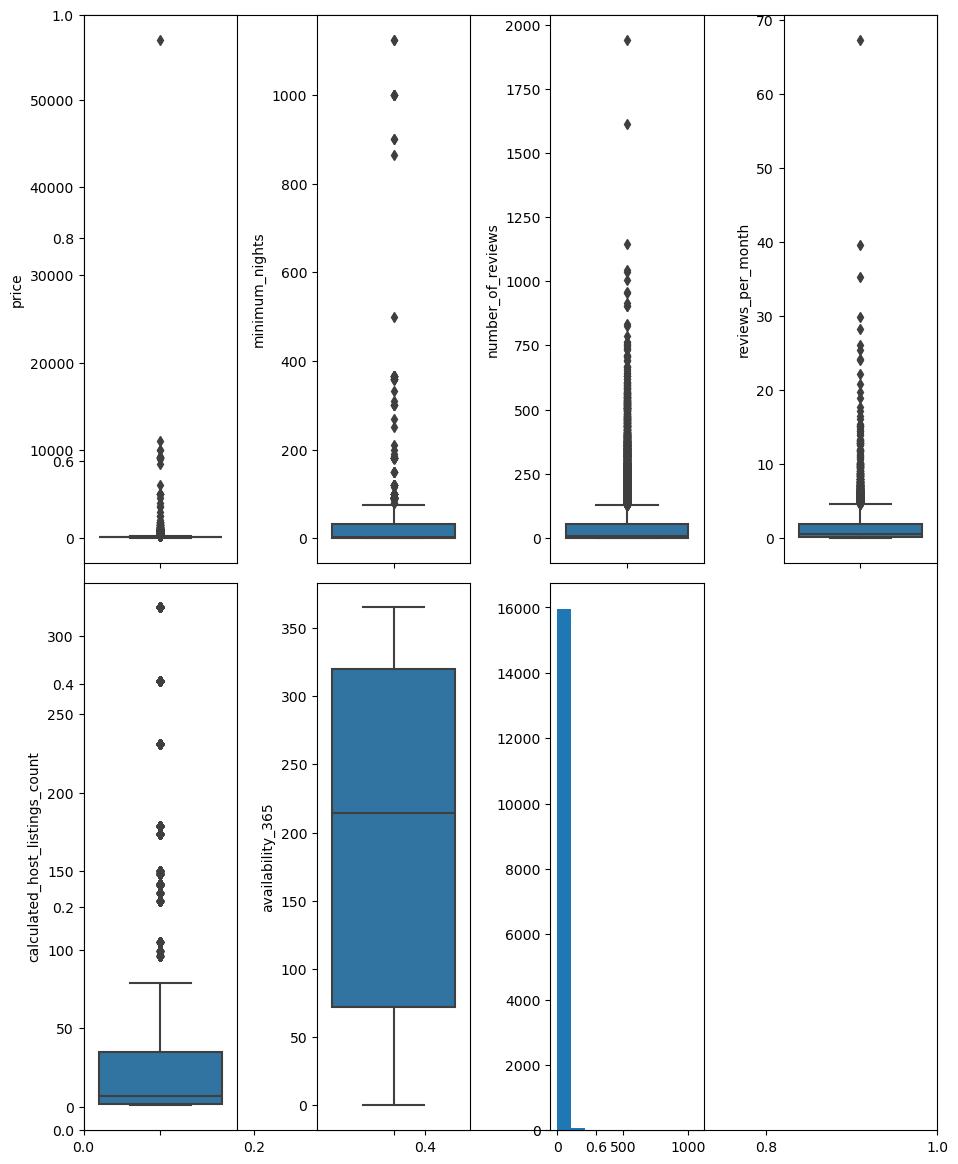

In [296]:

from pylab import *
f, ax = plt.subplots(figsize=(10, 12))

plt.subplot(2,4,1)
sns.boxplot(y = data['price']) 

plt.subplot(2,4,2)
sns.boxplot(y = data['minimum_nights'])

plt.subplot(2,4,3)
sns.boxplot(y = data['number_of_reviews'])

plt.subplot(2,4,4)
sns.boxplot(y = data['reviews_per_month'])

plt.subplot(2,4,5)
sns.boxplot(y = data['calculated_host_listings_count'])

plt.subplot(2,4,6)
sns.boxplot(y = data['availability_365'])

plt.subplot(2, 4, 7)  # Utilisez le subplot 2,4,7 pour le prochain histogramme
plt.hist(data['number_of_reviews_ltm'])

plt.tight_layout() # avoid overlap of plots
plt.draw()
plt.show()

In [ ]:
on voit que tous les proprietes sont incliner vers la gauche donc le vers le 1 quartier,

* La plupart des proprietes sont inclinées vers la gauche.
* J'utiliserai une transformation de log avant l'étape de modélisation:
Voici quelques points clés à considérer :

    * 1 Stabilisation de la variance (homoscédasticité) : Lorsque la variance des résidus n'est pas constante à travers les niveaux de la variable indépendante (hétéroscédasticité), cela peut violer les hypothèses de la régression linéaire. La transformation logarithmique peut aider à stabiliser la variance, rendant ainsi les résidus plus homoscédastiques.
    * 2 Linéarisation des relations non linéaires : Si la relation entre la variable indépendante et la variable dépendante est non linéaire, la transformation logarithmique peut aider à linéariser cette relation. Cela peut rendre l'ajustement du modèle linéaire plus approprié.
    * 3 Interprétation des coefficients : En transformant la variable dépendante par le logarithme, les coefficients dans le modèle peuvent être interprétés comme des élasticités plutôt que des variations absolues. Cela peut parfois rendre l'interprétation des résultats plus significative, surtout si les données présentent des propriétés multiplicatives.
    * 4 Réduction de l'influence des valeurs extrêmes : Les transformations logarithmiques ont tendance à réduire l'impact des valeurs extrêmes (outliers), ce qui peut améliorer la robustesse du modèle.
Cependant, il est important de noter que l'utilisation de transformations logarithmiques dépend du contexte spécifique des données. Dans certains cas, cela peut être approprié, tandis que dans d'autres cas, cela peut ne pas être nécessaire ou même inapproprié. Il est recommandé de comprendre les caractéristiques spécifiques de vos données et d'évaluer l'impact de la transformation logarithmique sur la qualité du modèle.

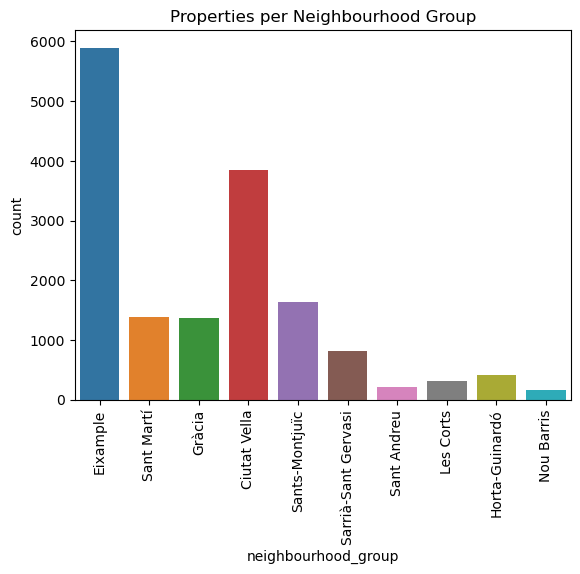

In [297]:
title = 'Properties per Neighbourhood Group'
sns.countplot(x='neighbourhood_group', data=data)
plt.title(title)
plt.xticks(rotation=90)  # Rotation des étiquettes sur l'axe des x
plt.show()


In [ ]:
la plupart des proprietes sont cituees a Exiample et a cuitat vella

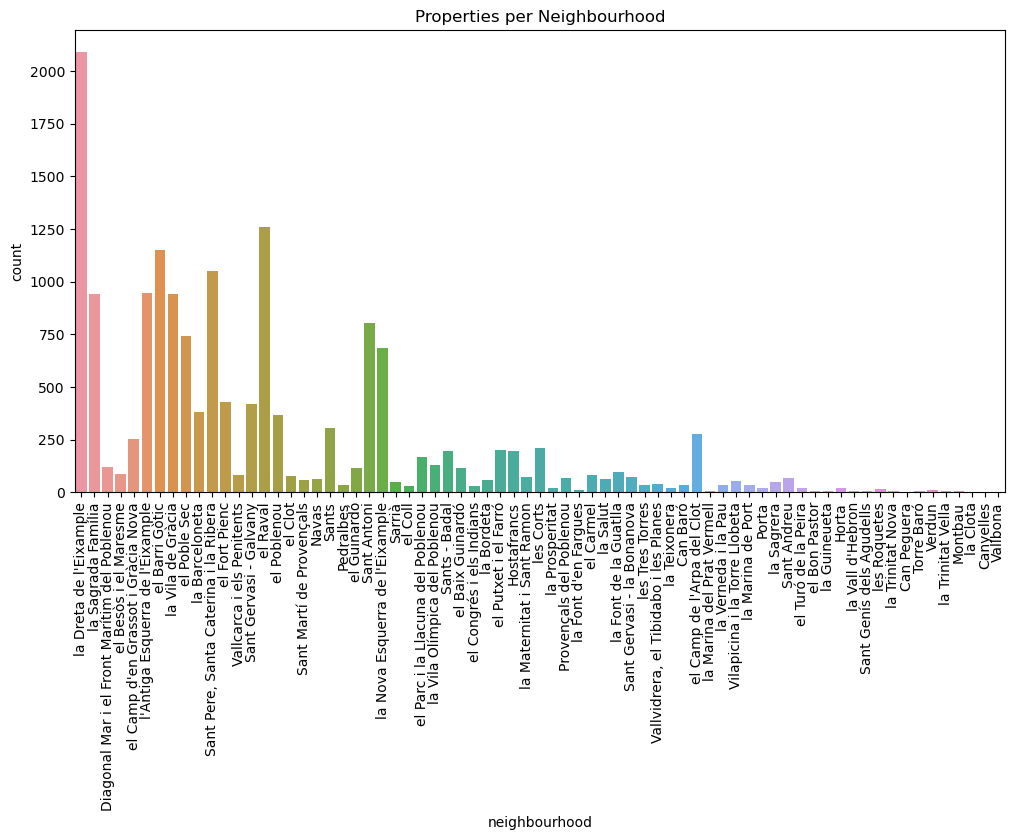

In [298]:
f, ax = plt.subplots(figsize=(12, 6))  # Crée une figure avec une taille de 12 pouces de largeur et 6 pouces de hauteur
title = 'Properties per Neighbourhood'
sns.countplot(x='neighbourhood', data=data)
plt.title(title)
plt.xticks(rotation=90)  # Rotation des étiquettes sur l'axe des x
plt.ioff()
plt.show() # Affiche la figure sans mode interactif


La plupart des propriétés sont une maison entière ou une chambre privée.

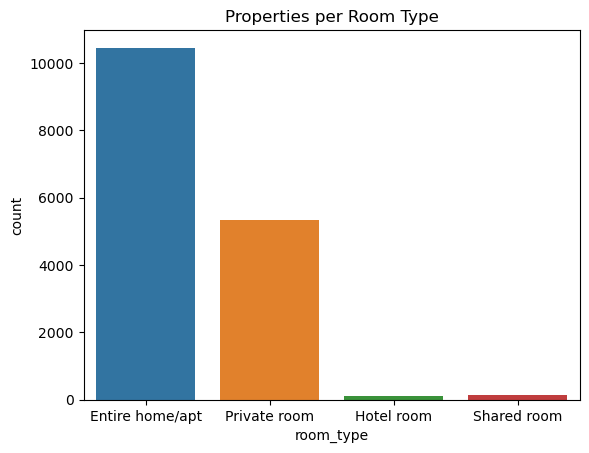

In [299]:
title = 'Properties per Room Type'
sns.countplot(x='room_type', data= data)
plt.title(title)
plt.ioff()
plt.show()

La plupart des propriétés sont une maison entière ou une chambre privée.

# 3. Visualization

* Examine relation between location and price
* Examine relation between room type and price

# 3.1 Correlation

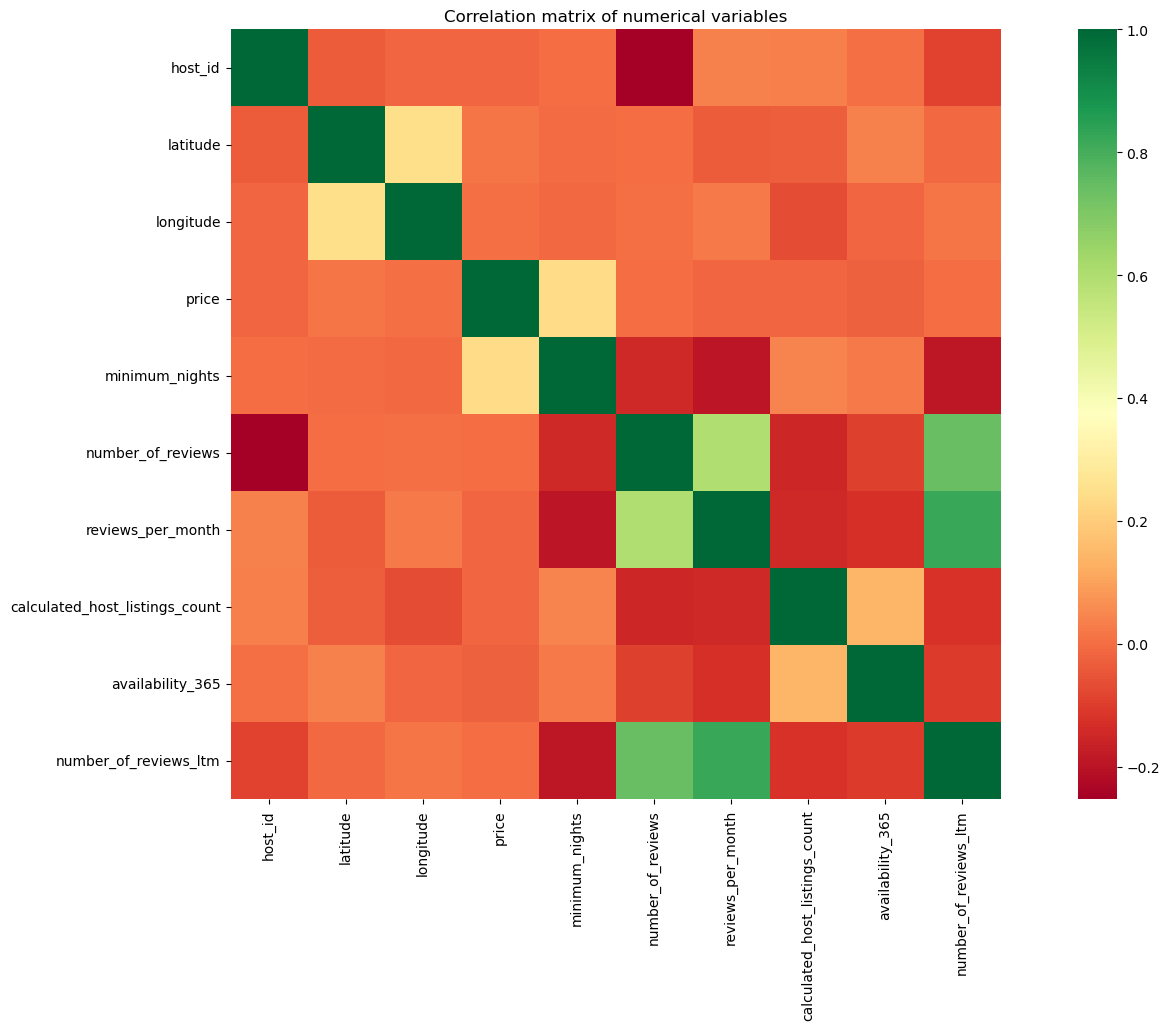

In [300]:
# Sélectionnez uniquement les colonnes numériques
numeric_data = data.select_dtypes(include=['number'])

# Appliquez la fonction de corrélation sur les données numériques
plt.figure(figsize=(20,10))
title = 'Correlation matrix of numerical variables'
sns.heatmap(numeric_data.corr(), square=True, cmap='RdYlGn')
plt.title(title)
plt.ioff()
plt.show()

In [ ]:
on a une correlation entre reviews_per_month et le number_of_reviews et aussi number_of_reviews et le reviews_per_month

le plus important et la colerrelation qui a entre le price et longitude qui de couleur claire qui egale a 0
pour la prediction on doit le faire avec les correlation positif et negatif pour faire une bonne prediction

## 3.2 Location

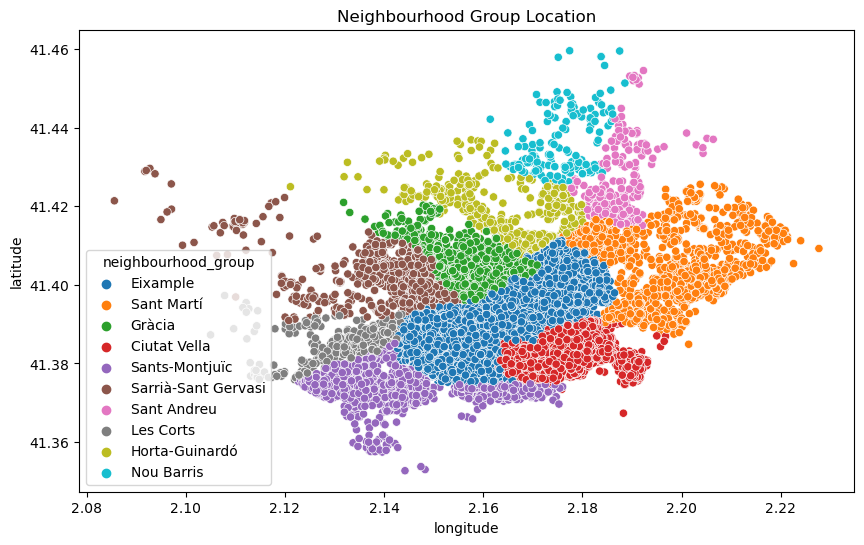

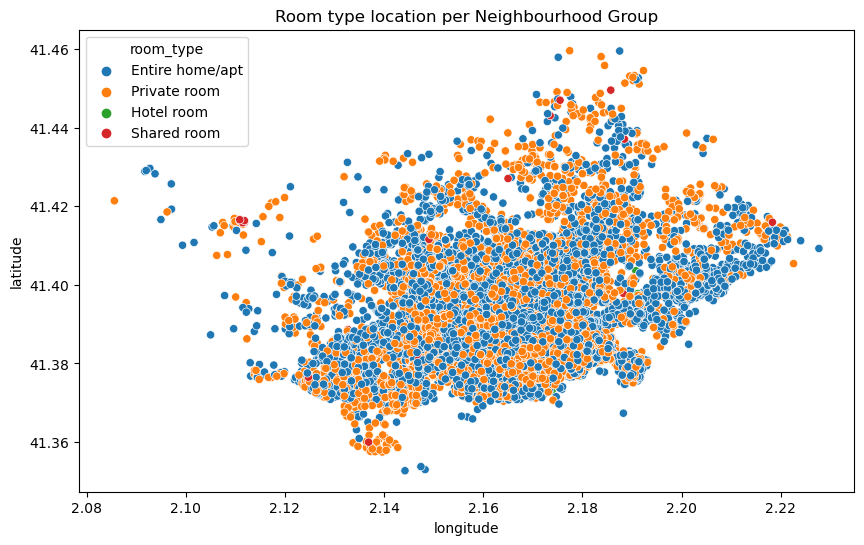

In [301]:
title = 'Neighbourhood Group Location'
plt.figure(figsize=(10,6))
sns.scatterplot(x=data.longitude,y=data.latitude,hue=data.neighbourhood_group).set_title(title)
plt.ioff()
plt.show()
title = 'Room type location per Neighbourhood Group'
plt.figure(figsize=(10,6))
sns.scatterplot(x=data.longitude,y=data.latitude,hue=data.room_type).set_title(title)
plt.ioff()
plt.show()

In [ ]:
pour la distribution par Neighbourhood Group on a toujour exiample qui prend la majorite des quartiers et en 2 em position Sant Marti aussi qui une bonne distribution  
_type de chambre emplacement par groupe de quartier: pour cette distribution on retrouve aussi Exiample et Sant Marti qui on la majorite des chambres par quartier

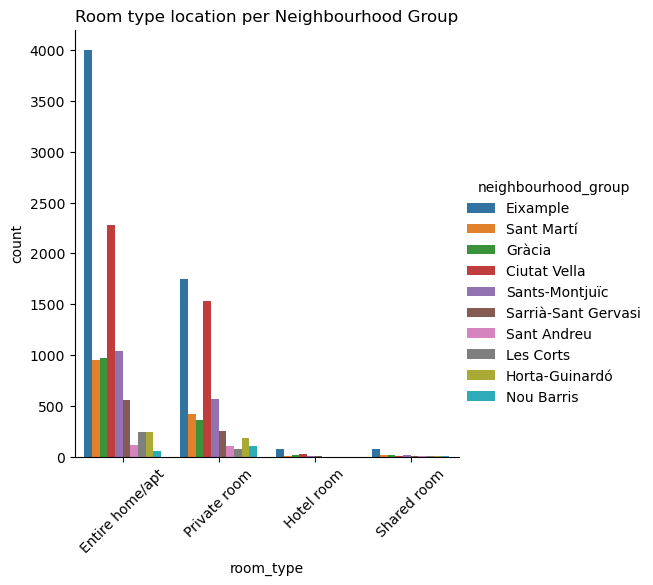

In [302]:
title = 'Room type location per Neighbourhood Group'
sns.catplot(x='room_type', kind="count", hue="neighbourhood_group", data=data);
plt.title(title)
plt.xticks(rotation=45)  # Rotation des étiquettes sur l'axe des x
plt.ioff()
plt.show()

* La majorité des logements/appartements  (Entire home/apt) sont situés à Exiample
* La majorité des chambres privées sont situées à Exiample et Ciutat Vella vient en deusieme position dans le classement 

## 3.3 Rapport prix/groupe de quartier Neighbourhood Group

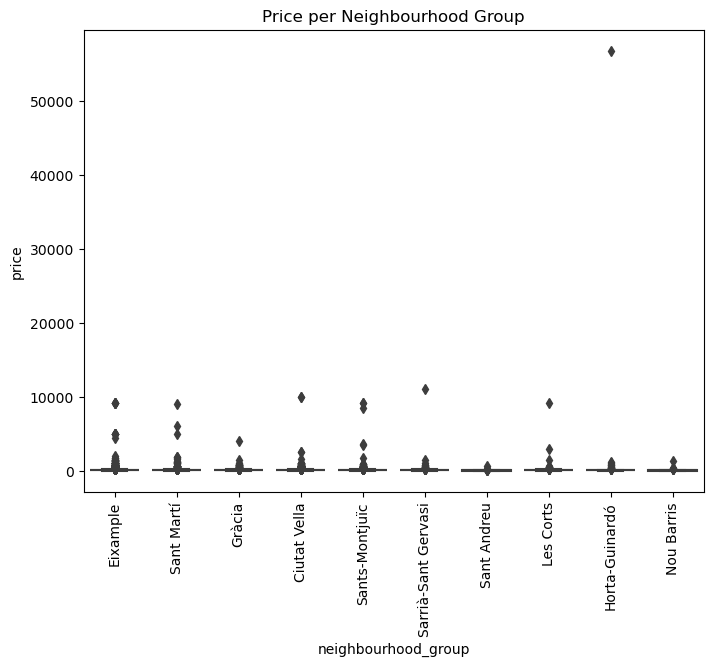

In [303]:

x= 'neighbourhood_group'
y= 'price'
title = 'Price per Neighbourhood Group'

f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data)
plt.title(title)
plt.xticks(rotation=90)  # Rotation des étiquettes sur l'axe des x
plt.ioff()
plt.show()

In [ ]:
pour le prix par quarier on le Horta Guinardo qui en premier position et ciutat vella et suprieur a Exiample 

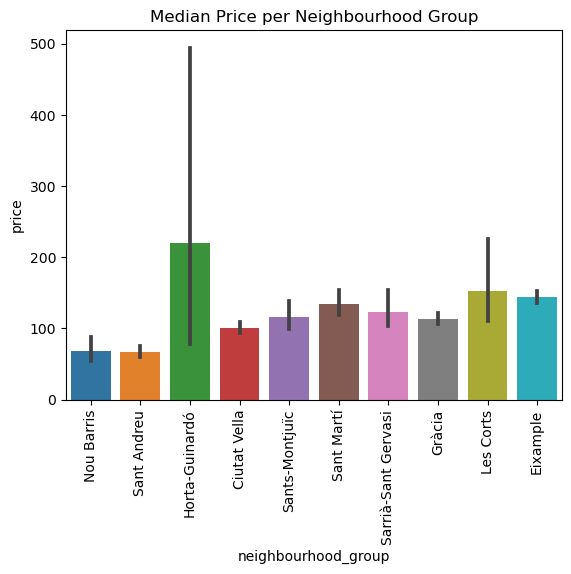

In [304]:

title = 'Median Price per Neighbourhood Group'
result = data.groupby(["neighbourhood_group"])['price'].aggregate('median').reset_index().sort_values('price')
sns.barplot(x='neighbourhood_group', y="price", data=data, order=result['neighbourhood_group'])
plt.title(title)
plt.xticks(rotation=90)  # Rotation des étiquettes sur l'axe des x
plt.ioff()
plt.show()


* Les propriétés à Horta-Guinardo sont plus chères
* L'ensemble de données peut être séparé entre les propriétés à bas prix et les propriétés à prix élevé

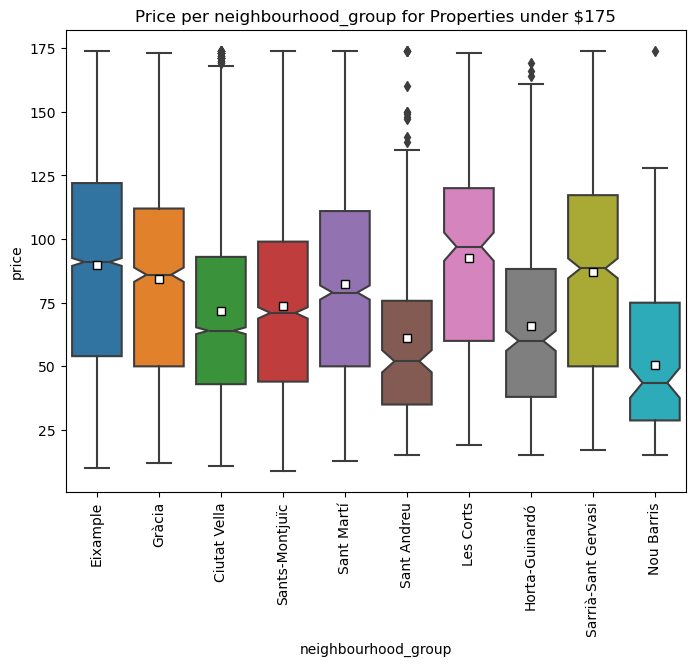

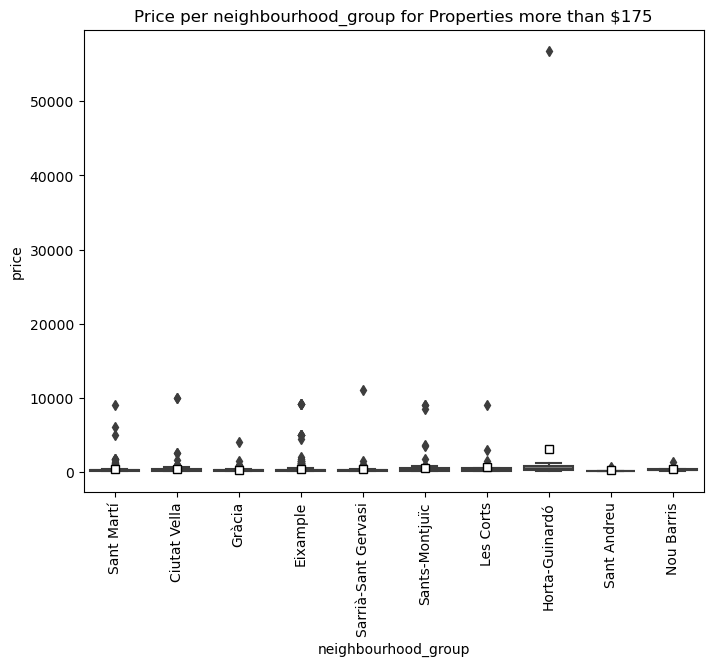

In [305]:
x='neighbourhood_group'
y='price'

title = 'Price per neighbourhood_group for Properties under $175'
data_filtered = data.loc[data['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.xticks(rotation=90)  # Rotation des étiquettes sur l'axe des x
plt.ioff()
plt.show()
f
title = 'Price per neighbourhood_group for Properties more than $175'
data_filtered = data.loc[data['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=False, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.xticks(rotation=90)  # Rotation des étiquettes sur l'axe des x
plt.ioff()
plt.show()

<img src="https://www.machinelearningplus.com/wp-content/uploads/2020/04/representation.png"/>

In [ ]:
25%----30 a 80 euro ---------le prix
25%----80 a 120 euro --------le prix
25%-----120 a 175 euro-------le prix la distribution des prix dans la region de Exiample

Les prix diffèrent considérablement selon les groupes de quartier pour les propriétés de moins de 175 $.

## 3.4 Price relation to Room Type

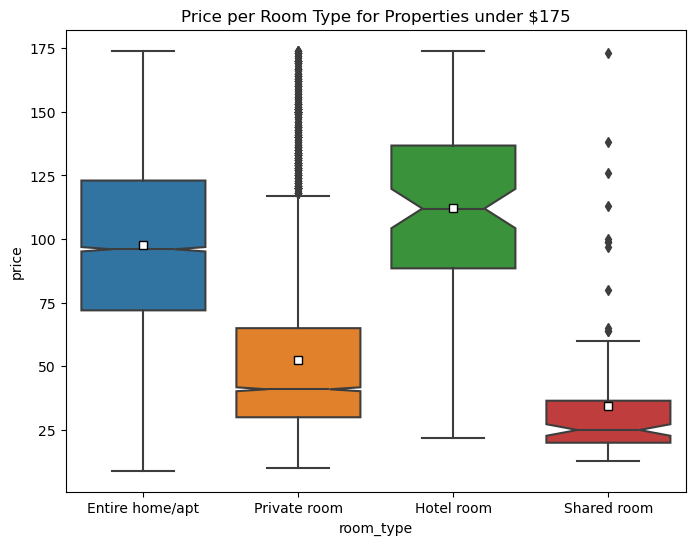

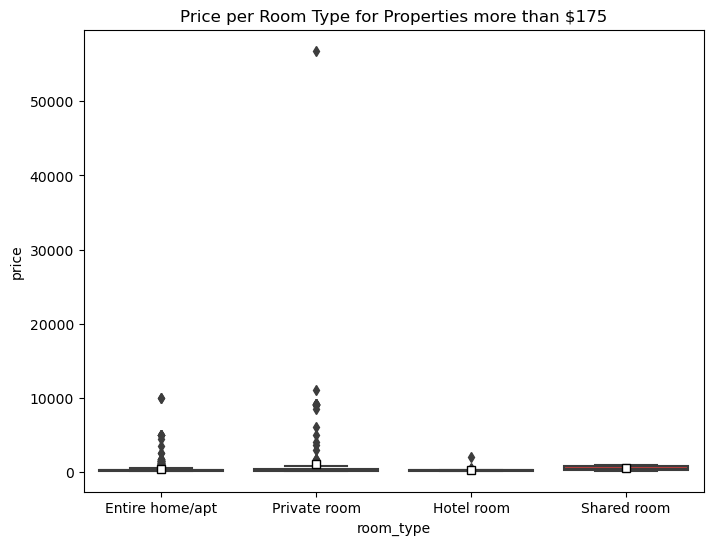

In [306]:
title = 'Price per Room Type for Properties under $175'
data_filtered = data.loc[data['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='room_type', y='price', data=data_filtered, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()
plt.show()

title = 'Price per Room Type for Properties more than $175'
data_filtered = data.loc[data['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='room_type', y='price', data=data_filtered, notch=False, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()
plt.show()

In [ ]:
la relation du prix paraport aux types de chambre: dapres ces boite a moustaches il ya des appartes aui coutent plus de 50000 euro

# 4. Modélisation du premier modèle

## 4.1 Data Preprocessing

In [307]:
# Load the Dataset  
#data.drop(['latitude', 'name',], axis=1, inplace=True)
data.drop(['name'], axis=1, inplace=True)
data_copy = data.copy()

In [177]:
data.head(10)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,65623,Eixample,la Dreta de l'Eixample,41.399390,2.17044,Entire home/apt,140.0,5,26,0.16,1,32,9
1,71615,Eixample,la Sagrada Família,41.405560,2.17262,Entire home/apt,121.0,1,40,0.31,30,39,7
2,971768,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou,41.408050,2.21487,Entire home/apt,304.0,2,105,0.74,9,137,26
3,90417,Sant Martí,el Besòs i el Maresme,41.412432,2.21975,Entire home/apt,200.0,3,75,0.48,2,300,11
4,135703,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.17015,Entire home/apt,79.0,1,99,0.66,3,297,16
5,440825,Eixample,l'Antiga Esquerra de l'Eixample,41.383590,2.15812,Private room,48.0,4,168,1.34,1,18,29
6,73163,Ciutat Vella,el Barri Gòtic,41.380620,2.17517,Entire home/apt,120.0,5,8,0.05,3,90,0
7,1013855,Gràcia,la Vila de Gràcia,41.398770,2.15887,Entire home/apt,120.0,4,244,1.67,1,129,44
8,1014050,Sants-Montjuïc,el Poble Sec,41.372400,2.16480,Entire home/apt,150.0,3,142,0.96,1,0,22
9,73163,Ciutat Vella,el Barri Gòtic,41.379780,2.17623,Entire home/apt,226.0,5,217,1.35,3,228,27


La transformation logarithmique, en particulier la transformation logarithme base 10 (log10), est souvent utilisée dans la régression pour plusieurs raisons, notamment pour améliorer la linéarité, stabiliser la variance, et interpréter les coefficients de manière plus significative. Voici quelques raisons courantes pour lesquelles on utilise la transformation log10 dans la régression :

1. **Linéarisation des relations non linéaires :** Si la relation entre la variable dépendante et une variable indépendante est non linéaire, la transformation log10 peut être utilisée pour linéariser la relation. Cela peut rendre l'ajustement du modèle linéaire plus approprié, car les modèles linéaires sont plus faciles à interpréter et à estimer.

2. **Stabilisation de la variance :** Lorsque la variance des résidus n'est pas constante (hétéroscédasticité), une transformation logarithmique peut aider à stabiliser la variance. Cela peut contribuer à améliorer la validité des tests statistiques et à rendre les prédictions plus homogènes sur l'ensemble de la plage des valeurs de la variable indépendante.

3. **Interprétation des coefficients :** Lorsque vous appliquez une transformation log10 à la variable dépendante, les coefficients de régression sont interprétés comme des élasticités plutôt que des variations absolues. Par exemple, dans le cas de la régression log-linéaire, un coefficient de 0,05 signifie que pour une augmentation de 1 % de la variable indépendante, la variable dépendante augmente d'environ 0,05 %.

4. **Réduction de l'effet des valeurs aberrantes :** La transformation log10 peut réduire l'influence des valeurs aberrantes, car elle compresse l'échelle des valeurs. Cela peut être utile pour améliorer la robustesse du modèle aux observations atypiques.

Il est important de noter que l'utilisation de la transformation log10 dépend du contexte spécifique de votre ensemble de données et du problème que vous essayez de résoudre. Avant d'appliquer une transformation, il est recommandé de comprendre la nature de vos données et de vérifier si les hypothèses sous-jacentes à la régression linéaire sont remplies. La sélection de la meilleure transformation dépendra souvent de l'expérience, de la compréhension du domaine et de la nature des données.

In [178]:
# log10 transform
data.minimum_nights += 0.000000001
data['minimum_nights'] = np.log10(data['minimum_nights'])
data.number_of_reviews += 0.000000001
data['number_of_reviews'] = np.log10(data['number_of_reviews'])
data.reviews_per_month += 0.000000001
data['reviews_per_month'] = np.log10(data['reviews_per_month'])
data.calculated_host_listings_count += 0.000000001
data['calculated_host_listings_count'] = np.log10(data['calculated_host_listings_count'])
data.availability_365 += 0.000000001
data['availability_365'] = np.log10(data['availability_365'])
data.number_of_reviews_ltm += 0.000000001
data['number_of_reviews_ltm'] = np.log10(data['number_of_reviews_ltm'])

In [179]:
data.head(10)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,65623,Eixample,la Dreta de l'Eixample,41.399390,2.17044,Entire home/apt,140.0,6.989700e-01,1.414973,-0.795880,4.342945e-10,1.505150,0.954243
1,71615,Eixample,la Sagrada Família,41.405560,2.17262,Entire home/apt,121.0,4.342945e-10,1.602060,-0.508638,1.477121e+00,1.591065,0.845098
2,971768,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou,41.408050,2.21487,Entire home/apt,304.0,3.010300e-01,2.021189,-0.130768,9.542425e-01,2.136721,1.414973
3,90417,Sant Martí,el Besòs i el Maresme,41.412432,2.21975,Entire home/apt,200.0,4.771213e-01,1.875061,-0.318759,3.010300e-01,2.477121,1.041393
4,135703,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.17015,Entire home/apt,79.0,4.342945e-10,1.995635,-0.180456,4.771213e-01,2.472756,1.204120
5,440825,Eixample,l'Antiga Esquerra de l'Eixample,41.383590,2.15812,Private room,48.0,6.020600e-01,2.225309,0.127105,4.342945e-10,1.255273,1.462398
6,73163,Ciutat Vella,el Barri Gòtic,41.380620,2.17517,Entire home/apt,120.0,6.989700e-01,0.903090,-1.301030,4.771213e-01,1.954243,-9.000000
7,1013855,Gràcia,la Vila de Gràcia,41.398770,2.15887,Entire home/apt,120.0,6.020600e-01,2.387390,0.222716,4.342945e-10,2.110590,1.643453
8,1014050,Sants-Montjuïc,el Poble Sec,41.372400,2.16480,Entire home/apt,150.0,4.771213e-01,2.152288,-0.017729,4.342945e-10,-9.000000,1.342423
9,73163,Ciutat Vella,el Barri Gòtic,41.379780,2.17623,Entire home/apt,226.0,6.989700e-01,2.336460,0.130334,4.771213e-01,2.357935,1.431364


In [180]:
# Encoding categorical data
data = pd.get_dummies(data, columns=['room_type'], drop_first=True)
data = pd.get_dummies(data, columns=['neighbourhood'], drop_first=True)
data = pd.get_dummies(data, columns=['neighbourhood_group'], drop_first=True)

In [181]:
data.head(20)

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,...,neighbourhood_les Tres Torres,neighbourhood_group_Eixample,neighbourhood_group_Gràcia,neighbourhood_group_Horta-Guinardó,neighbourhood_group_Les Corts,neighbourhood_group_Nou Barris,neighbourhood_group_Sant Andreu,neighbourhood_group_Sant Martí,neighbourhood_group_Sants-Montjuïc,neighbourhood_group_Sarrià-Sant Gervasi
0,65623,41.399390,2.170440,140.0,6.989700e-01,1.414973e+00,-0.795880,4.342945e-10,1.505150,9.542425e-01,...,False,True,False,False,False,False,False,False,False,False
1,71615,41.405560,2.172620,121.0,4.342945e-10,1.602060e+00,-0.508638,1.477121e+00,1.591065,8.450980e-01,...,False,True,False,False,False,False,False,False,False,False
2,971768,41.408050,2.214870,304.0,3.010300e-01,2.021189e+00,-0.130768,9.542425e-01,2.136721,1.414973e+00,...,False,False,False,False,False,False,False,True,False,False
3,90417,41.412432,2.219750,200.0,4.771213e-01,1.875061e+00,-0.318759,3.010300e-01,2.477121,1.041393e+00,...,False,False,False,False,False,False,False,True,False,False
4,135703,41.405660,2.170150,79.0,4.342945e-10,1.995635e+00,-0.180456,4.771213e-01,2.472756,1.204120e+00,...,False,False,True,False,False,False,False,False,False,False
5,440825,41.383590,2.158120,48.0,6.020600e-01,2.225309e+00,0.127105,4.342945e-10,1.255273,1.462398e+00,...,False,True,False,False,False,False,False,False,False,False
6,73163,41.380620,2.175170,120.0,6.989700e-01,9.030900e-01,-1.301030,4.771213e-01,1.954243,-9.000000e+00,...,False,False,False,False,False,False,False,False,False,False
7,1013855,41.398770,2.158870,120.0,6.020600e-01,2.387390e+00,0.222716,4.342945e-10,2.110590,1.643453e+00,...,False,False,True,False,False,False,False,False,False,False
8,1014050,41.372400,2.164800,150.0,4.771213e-01,2.152288e+00,-0.017729,4.342945e-10,-9.000000,1.342423e+00,...,False,False,False,False,False,False,False,False,True,False
9,73163,41.379780,2.176230,226.0,6.989700e-01,2.336460e+00,0.130334,4.771213e-01,2.357935,1.431364e+00,...,False,False,False,False,False,False,False,False,False,False


In [182]:
# Filter the dataset for prices between 50 and $175
data_filtered_low = data.loc[(data['price'] < 175)]

In [183]:
# Filter the dataset for prices superior to $175
data_filtered_high = data.loc[(data['price'] > 175)]

## 4.2 Régression linéaire multiple

### 4.2.1 Modélisation sur un ensemble de données de prix inférieurs

In [184]:
# Split the dataset
X = data_filtered_low.drop('price', axis=1).values
y = data_filtered_low['price'].values
y = np.log10(y)

In [185]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = lr.predict(X_test)

In [186]:
df = pd.DataFrame({'Actual': np.round(10 ** y_test, 0), 
                   'Predicted': np.round(10 ** y_pred, 0)})
df.head(10)

,Actual,Predicted
0,24.0,29.0
1,35.0,35.0
2,49.0,54.0
3,75.0,43.0
4,38.0,34.0
5,138.0,110.0
6,125.0,96.0
7,80.0,119.0
8,57.0,62.0
9,170.0,76.0


In [187]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('Price mean:', np.round(np.mean(y), 2))  
print('Price std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, lr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, lr.predict(X_test), multioutput='variance_weighted'), 2))

Price mean: 1.84
Price std: 0.25
RMSE: 0.17
R2 score train: 0.54
R2 score test: 0.5


### 4.2.2 Modélisation de l'ensemble de données sur les prix les plus élevés

In [202]:
# Split the dataset
X = data_filtered_high.drop('price', axis=1).values
y = data_filtered_high['price'].values
y = np.log10(y)

In [196]:
from sklearn.impute import SimpleImputer

# Instantiate the imputer
imputer = SimpleImputer(strategy='mean')  # You can choose strategy='median' or 'most_frequent' depending on your data

# Fit and transform on the training set
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test set
X_test_imputed = imputer.transform(X_test)

# Now, you can proceed with fitting your Linear Regression model
lr.fit(X_train_imputed, y_train)


LinearRegression()

In [205]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = lr.predict(X_test)

In [206]:
df = pd.DataFrame({'Actual': np.round(10 ** y_test, 0), 
                   'Predicted': np.round(10 ** y_pred, 0)})
df.head(10)

,Actual,Predicted
0,277.0,208.0
1,327.0,378.0
2,192.0,269.0
3,185.0,294.0
4,1785.0,263.0
5,303.0,317.0
6,841.0,336.0
7,180.0,367.0
8,309.0,357.0
9,395.0,378.0


In [207]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('Price mean:', np.round(np.mean(y), 2))  
print('Price std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, lr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, lr.predict(X_test), multioutput='variance_weighted'), 2))

Price mean: 2.46
Price std: 0.25
RMSE: 0.26
R2 score train: 0.14
R2 score test: 0.01


## 4.3 Régression de forêt aléatoire

### 4.3.1 Modélisation sur un ensemble de données de prix inférieurs

In [208]:
# Split the dataset
X = data_filtered_low.drop('price', axis=1).values
y = data_filtered_low['price'].values
y = np.log10(y)

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [210]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=8, n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rfr.predict(X_test)

In [211]:
df = pd.DataFrame({'Actual': np.round(10 ** y_test, 0), 
                   'Predicted': np.round(10 ** y_pred, 0)})
df.head(10)

,Actual,Predicted
0,24.0,26.0
1,35.0,23.0
2,49.0,45.0
3,75.0,35.0
4,38.0,33.0
5,138.0,108.0
6,125.0,106.0
7,80.0,94.0
8,57.0,63.0
9,170.0,65.0


In [213]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('Price mean:', np.round(np.mean(y), 2))  
print('Price std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, rfr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, rfr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, rfr.predict(X_test), multioutput='variance_weighted'), 2))

Price mean: 1.84
Price std: 0.25
RMSE: 0.15
R2 score train: 0.71
R2 score test: 0.64


### 4.3.2 Modélisation de l'ensemble de données sur les prix les plus élevés

In [214]:
# Split the dataset
X = data_filtered_high.drop('price', axis=1).values
y = data_filtered_high['price'].values
y = np.log10(y)

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [216]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=8, n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rfr.predict(X_test)

In [217]:
df = pd.DataFrame({'Actual': np.round(10 ** y_test, 0), 
                   'Predicted': np.round(10 ** y_pred, 0)})
df.head(10)

,Actual,Predicted
0,277.0,238.0
1,327.0,252.0
2,192.0,259.0
3,185.0,284.0
4,1785.0,260.0
5,303.0,264.0
6,841.0,507.0
7,180.0,274.0
8,309.0,384.0
9,395.0,328.0


In [218]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('Price mean:', np.round(np.mean(y), 2))  
print('Price std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, rfr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, rfr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, rfr.predict(X_test), multioutput='variance_weighted'), 2))

Price mean: 2.46
Price std: 0.25
RMSE: 0.22
R2 score train: 0.6
R2 score test: 0.31


# 5. Modélisation du deuxième modèle

Essayez d'abord de regrouper les données.

## 5.1 Data Preprocessing

In [253]:
data_encoded.drop(['name'], axis=1, inplace=True)

In [254]:
data_encoded.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,65623,Eixample,la Dreta de l'Eixample,41.399390,2.17044,Entire home/apt,140.0,minimum_nights_high,minimum_nights_medium,reviews_per_month_low,calculated_host_listings_count_low,availability_low,number_of_reviews_ltm_high
1,71615,Eixample,la Sagrada Família,41.405560,2.17262,Entire home/apt,121.0,minimum_nights_low,number_of_reviews_high,reviews_per_month_low,calculated_host_listings_count_high,availability_low,number_of_reviews_ltm_high
2,971768,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou,41.408050,2.21487,Entire home/apt,304.0,minimum_nights_low,number_of_reviews_high,reviews_per_month_high,calculated_host_listings_count_high,availability_low,number_of_reviews_ltm_high
3,90417,Sant Martí,el Besòs i el Maresme,41.412432,2.21975,Entire home/apt,200.0,minimum_nights_low,number_of_reviews_high,reviews_per_month_low,calculated_host_listings_count_low,availability_high,number_of_reviews_ltm_high
4,135703,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.17015,Entire home/apt,79.0,minimum_nights_low,number_of_reviews_high,reviews_per_month_high,calculated_host_listings_count_high,availability_high,number_of_reviews_ltm_high


In [255]:
print(data_encoded.columns)


Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')


In [256]:
# Encoding categorical data
data_encoded = pd.get_dummies(data_encoded, columns=['neighbourhood_group'], drop_first=True)
data_encoded = pd.get_dummies(data_encoded, columns=['neighbourhood'], drop_first=True)
data_encoded = pd.get_dummies(data_encoded, columns=['room_type'], drop_first=True)
data_encoded = pd.get_dummies(data_encoded, columns=['minimum_nights'], drop_first=True)
data_encoded = pd.get_dummies(data_encoded, columns=['number_of_reviews'], drop_first=True)
data_encoded = pd.get_dummies(data_encoded, columns=['reviews_per_month'], drop_first=True)
data_encoded = pd.get_dummies(data_encoded, columns=['calculated_host_listings_count'], drop_first=True)
data_encoded = pd.get_dummies(data_encoded, columns=['availability_365'], drop_first=True)

In [257]:
data_encoded.head()

,host_id,latitude,longitude,price,number_of_reviews_ltm,neighbourhood_group_Eixample,neighbourhood_group_Gràcia,neighbourhood_group_Horta-Guinardó,neighbourhood_group_Les Corts,neighbourhood_group_Nou Barris,...,neighbourhood_les Tres Torres,room_type_Hotel room,room_type_Private room,room_type_Shared room,minimum_nights_minimum_nights_high,number_of_reviews_minimum_nights_medium,number_of_reviews_number_of_reviews_high,reviews_per_month_reviews_per_month_high,calculated_host_listings_count_calculated_host_listings_count_high,availability_365_availability_high
0,65623,41.399390,2.17044,140.0,number_of_reviews_ltm_high,True,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
1,71615,41.405560,2.17262,121.0,number_of_reviews_ltm_high,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,971768,41.408050,2.21487,304.0,number_of_reviews_ltm_high,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
3,90417,41.412432,2.21975,200.0,number_of_reviews_ltm_high,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
4,135703,41.405660,2.17015,79.0,number_of_reviews_ltm_high,False,True,False,False,False,...,False,False,False,False,False,False,True,True,True,True


In [258]:
# Data filtering
# Filter the dataset for prices between 50 and $175
data_filtered_low = data_encoded.loc[(data['price'] < 175)]
# Filter the dataset for prices superior to $175
data_filtered_high = data_encoded.loc[(data['price'] > 175)]

## 5.2 Régression linéaire multiple

### 5.2.1 Modélisation sur un ensemble de données de prix inférieurs

In [339]:
# Copy the dataset
data_encoded = data_filtered_low.copy()

# Encode categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data_encoded, drop_first=True)

# Split the dataset
X = data_encoded.drop('price', axis=1).values
y = data_encoded['price'].values
y = np.log10(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = lr.predict(X_test)

df = pd.DataFrame({'Actual': np.round(10 ** y_test, 0), 
                   'Predicted': np.round(10 ** y_pred, 0)})
df.head(10)



,Actual,Predicted
0,354.0,149.0
1,137.0,121.0
2,109.0,48.0
3,46.0,77.0
4,119.0,106.0
5,59.0,163.0
6,218.0,71.0
7,71.0,110.0
8,45.0,55.0
9,75.0,95.0


In [340]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('Price mean:', np.round(np.mean(y), 2))  
print('Price std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, lr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, lr.predict(X_test), multioutput='variance_weighted'), 2))

Price mean: 1.93
Price std: 0.32
RMSE: 0.26
R2 score train: 0.34
R2 score test: 0.35


### 5.2.2 Modélisation sur un ensemble de données de prix plus élevés

In [341]:
# Utilisez get_dummies pour encoder les variables catégorielles
data_encoded = pd.get_dummies(data_filtered_high)

# Split the dataset
X = data_encoded.drop('price', axis=1).values
y = data_encoded['price'].values
y = np.log10(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = lr.predict(X_test)

df = pd.DataFrame({'Actual': np.round(10 ** y_test, 0), 
                   'Predicted': np.round(10 ** y_pred, 0)})
df.head(10)


,Actual,Predicted
0,277.0,225.0
1,327.0,397.0
2,192.0,274.0
3,185.0,297.0
4,1785.0,308.0
5,303.0,315.0
6,841.0,329.0
7,180.0,346.0
8,309.0,395.0
9,395.0,358.0


In [342]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('Price mean:', np.round(np.mean(y), 2))  
print('Price std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, lr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, lr.predict(X_test), multioutput='variance_weighted'), 2))

Price mean: 2.46
Price std: 0.25
RMSE: 0.26
R2 score train: 0.13
R2 score test: -0.01


In [ ]:
je suis arreter ici sur le rapport

## 5.3 Random Forest Regression

### 5.3.1 Modélisation sur un ensemble de données de prix inférieurs

In [395]:
print(data_filtered_low.dtypes)


host_id                             int64
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
dtype: object


In [379]:
non_numeric_columns = data_filtered_low.select_dtypes(exclude=['float', 'int']).columns
print(non_numeric_columns)


Index(['neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object')


In [430]:
import pandas as pd

# Convertir X_train en DataFrame
X_train_df = pd.DataFrame(X_train)

# Appliquer l'encodage one-hot aux variables catégorielles
X_train_encoded = pd.get_dummies(X_train_df)


In [435]:
import pandas as pd

# Assurez-vous que les données sont au format DataFrame de Pandas
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train)

if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test)

# Vérifiez les données manquantes ou non numériques
print(X_train.info())
print(X_test.info())

# Utilisez get_dummies() pour l'encodage one-hot des variables catégorielles
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11239 entries, 0 to 11238
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       11239 non-null  object
 1   1       11239 non-null  object
 2   2       11239 non-null  object
 3   3       11239 non-null  object
 4   4       11239 non-null  object
 5   5       11239 non-null  object
 6   6       11239 non-null  object
 7   7       11239 non-null  object
 8   8       11239 non-null  object
 9   9       11239 non-null  object
 10  10      11239 non-null  object
 11  11      11239 non-null  object
dtypes: object(12)
memory usage: 1.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4817 entries, 0 to 4816
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       4817 non-null   object
 1   1       4817 non-null   object
 2   2       4817 non-null   object
 3   3       4817 non-null   object
 4   4       4817 

In [437]:
# Split the dataset
X = data_filtered_low.drop('price', axis=1).values
y = data_filtered_low['price'].values
y = np.log10(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=8, n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rfr.predict(X_test)

df = pd.DataFrame({'Actual': np.round(10 ** y_test, 0), 
                   'Predicted': np.round(10 ** y_pred, 0)})
df.head(10)

ValueError: could not convert string to float: 'Sants-Montjuïc'

In [400]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('Price mean:', np.round(np.mean(y), 2))  
print('Price std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, rfr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, rfr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, rfr.predict(X_test), multioutput='variance_weighted'), 2))

Price mean: 1.93
Price std: 0.32


NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### 5.3.2 Modélisation sur un ensemble de données de prix plus élevés

In [402]:
# Split the dataset
X = data_filtered_high.drop('price', axis=1).values
y = data_filtered_high['price'].values
y = np.log10(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=8, n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rfr.predict(X_test)

df = pd.DataFrame({'Actual': np.round(10 ** y_test, 0), 
                   'Predicted': np.round(10 ** y_pred, 0)})
df.head(10)

from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

ValueError: could not convert string to float: 'number_of_reviews_ltm_low'

In [403]:
# Utilisez get_dummies pour encoder les variables catégorielles
data_encoded = pd.get_dummies(data_filtered_high)

# Split the dataset
X = data_encoded.drop('price', axis=1).values
y = data_encoded['price'].values
y = np.log10(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=8, n_estimators=100, random_state=0)
rfr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rfr.predict(X_test)

df = pd.DataFrame({'Actual': np.round(10 ** y_test, 0), 
                   'Predicted': np.round(10 ** y_pred, 0)})
df.head(10)


,Actual,Predicted
0,277.0,260.0
1,327.0,229.0
2,192.0,278.0
3,185.0,277.0
4,1785.0,334.0
5,303.0,269.0
6,841.0,311.0
7,180.0,251.0
8,309.0,358.0
9,395.0,374.0


In [404]:
print('Price mean:', np.round(np.mean(y), 2))  
print('Price std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, rfr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, rfr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, rfr.predict(X_test), multioutput='variance_weighted'), 2))

Price mean: 2.46
Price std: 0.25
RMSE: 0.24
R2 score train: 0.54
R2 score test: 0.2


# 6. Conclusion

* Les propriétés présentent de grandes différences de prix.
* Séparer l'ensemble de données par catégories de prix est utile pour l'analyse.
* Les variables les plus intéressantes concernant la prévision des prix sont :
    * Localisation
    * Type de chambre
    * calculé_hôte_listings_count
    * Nombre d'avis
* Les modèles de prévision des prix ne fonctionnent pas bien
    * Le meilleur score est de 0,55
    * Les prévisions ne sont pas précises pour un prix inférieur à 175 $ (75 % de l'ensemble de données)
    * L'utilisation de données ecnodées catégorielles n'a pas amélioré le modèle
* Prochaines étapes possibles
    * La prochaine étape pourrait consister à transformer les variables continues en variables catégorielles, car cela peut aider à capturer les relations non linéaires.
    * Je doute qu'un réseau de neurones soit utile ici car le nombre d'observations est limité.